## Image Preparation For Convolutional Neural Networks

The first thing we need to do is get and prepare the data for which we'll be training the CNN.

The data set we'll use is a random subset of the data set from the Kaggle Dogs Versus Cats competition. You can download the data [here](https://www.kaggle.com/c/dogs-vs-cats/data).

After Download the train.zip , place the images in the following stracture of root directory data\dogs-vs-cats

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
current_directory = os.getcwd()
print(current_directory)
os.chdir('../')
current_directory = os.getcwd()
print(current_directory)

c:\Users\ASUS\Desktop\Music AI\Python-Deep-Learning-and-Neural-Networks\notebooks
c:\Users\ASUS\Desktop\Music AI\Python-Deep-Learning-and-Neural-Networks


In [15]:
# Organize data into train, valid, test dirs
os.chdir('data/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../../')

### Process The Data

In [4]:
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.


Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


### Visualize The Data

In [6]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [7]:
imgs, labels = next(train_batches)

In [8]:
import sys

# Get the current working directory
current_directory = os.getcwd()

# Assuming the notebooks are in the 'notebooks' directory, navigate up to the project root
project_root = os.path.abspath(os.path.join(current_directory, '..'))

# Append the project root to sys.path
sys.path.append(project_root)

from src.plot import plotImages

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

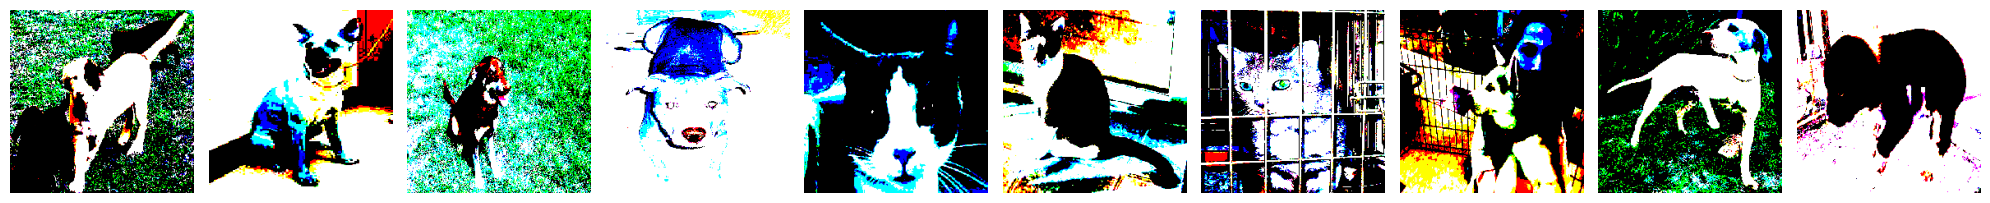

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [9]:
plotImages(imgs)
print(labels)

## Build and train a CNN

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10


100/100 - 11s - loss: 19.6444 - accuracy: 0.5370 - val_loss: 5.4414 - val_accuracy: 0.6200 - 11s/epoch - 114ms/step
Epoch 2/10
100/100 - 10s - loss: 2.3800 - accuracy: 0.7480 - val_loss: 3.2498 - val_accuracy: 0.6000 - 10s/epoch - 103ms/step
Epoch 3/10
100/100 - 11s - loss: 0.4379 - accuracy: 0.9170 - val_loss: 3.3019 - val_accuracy: 0.5850 - 11s/epoch - 108ms/step
Epoch 4/10
100/100 - 11s - loss: 0.1806 - accuracy: 0.9530 - val_loss: 3.0001 - val_accuracy: 0.6300 - 11s/epoch - 112ms/step
Epoch 5/10
100/100 - 12s - loss: 0.0239 - accuracy: 0.9910 - val_loss: 2.8515 - val_accuracy: 0.6500 - 12s/epoch - 118ms/step
Epoch 6/10
100/100 - 11s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.8138 - val_accuracy: 0.6700 - 11s/epoch - 111ms/step
Epoch 7/10
100/100 - 11s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.7885 - val_accuracy: 0.6700 - 11s/epoch - 114ms/step
Epoch 8/10
100/100 - 12s - loss: 6.7350e-04 - accuracy: 1.0000 - val_loss: 2.7364 - val_accuracy: 0.6650 - 12s/epoc